In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Loading Data For Classification**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the dataset
df = pd.read_csv("/content/drive/MyDrive/FinalAssesment/Earthquake.csv")

**Exploratory Data Analysis and Data Understanding**

The **Nepal Earthquake Severity Index** dataset, sourced from earthquake impact assessment studies in Nepal and accessible via Kaggle in CSV format, is well-suited for a **classification task**. This dataset aligns with **UNSDG Goal 11: Sustainable Cities and Communities**, as it focuses on enhancing disaster resilience, and **UNSDG Goal 13: Climate Action**, by addressing the impact of earthquakes on vulnerable communities.  

The dataset consists of **3,986 rows and 12 columns**, including **P_CODE** (unique identifier), **VDC_NAME**, **DISTRICT**, **REGION**, **Hazard (Intensity), Exposure, Housing vulnerability, Poverty level, Vulnerability index, Severity, Severity Normalized score,** and **Severity Category** (categorical classification). For this classification task, the target variable is **Severity Category**, which classifies locations into different severity levels based on earthquake impact factors.  

By utilizing classification models, this dataset helps in identifying **high-risk areas and key factors contributing to earthquake severity**. It addresses critical questions such as:  

- Which districts are the most vulnerable to earthquakes?  
- What are the key contributors to earthquake severity?  
- How accurately can we predict **severity categories** based on factors like housing vulnerability, exposure, and poverty levels?  
- What are the relationships between **housing vulnerability and poverty** or **exposure measures and earthquake impacts**?  

The dataset is **well-structured, with minimal missing values** and contains a mix of numerical and categorical attributes, making it highly suitable for **disaster risk classification tasks** using machine learning models.  


# **EDA**

In [4]:
#displaying the first five rows of the dataset
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
0,C-BAG-27-031,KathmanduN.P.,Kathmandu,Central,2.17,10.00,8.86,1.82,5.34,4.88,10.0000,Highest
1,C-BAG-25-027,LalitpurN.P.,Lalitpur,Central,1.72,2.26,8.40,0.82,4.61,2.62,5.3707,Highest
2,C-NAR-35-005,BharatpurN. P.,Chitawan,Central,2.21,1.47,5.38,2.53,3.96,2.34,4.8083,Highest
3,C-BAG-26-012,MadhyapurThimiN.P.,Bhaktapur,Central,2.45,0.85,8.23,0.89,4.56,2.12,4.3447,Highest
4,C-BAG-27-028,Jorpati,Kathmandu,Central,1.91,0.87,8.86,1.82,5.34,2.07,4.2407,Highest


In [5]:
#displaying the last five rows of the dataset
print("Last 5 rows of the dataset:")
df.tail()

Last 5 rows of the dataset:


,P_CODE,VDC_NAME,DISTRICT,REGION,Hazard (Intensity),Exposure,Housing,Poverty,Vulnerability,Severity,Severity Normalized,Severity category
3981,F-SET-70-052,Khaptad National Park,Doti,Far-Western,0.00,0.0,8.77,8.26,8.52,0.0,0.0,Lowest
3982,M-BHE-58-033,Royal Bardiya Nation,Bardiya,Mid-Western,0.00,0.0,4.64,4.82,4.73,0.0,0.0,Lowest
3983,W-LUM-48-075,Royal Chitawan Natio,Nawalparasi,Western,0.84,0.0,5.61,3.51,4.56,0.0,0.0,Lowest
3984,W-LUM-49-072,Lumbini Development,Rupandehi,Western,0.02,0.0,7.81,2.95,5.38,0.0,0.0,Lowest
3985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#acquiring the details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3986 entries, 0 to 3985
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   P_CODE               3985 non-null   object 
 1   VDC_NAME             3985 non-null   object 
 2   DISTRICT             3985 non-null   object 
 3   REGION               3985 non-null   object 
 4   Hazard (Intensity)   3985 non-null   float64
 5   Exposure             3985 non-null   float64
 6   Housing              3985 non-null   float64
 7   Poverty              3985 non-null   float64
 8   Vulnerability        3985 non-null   float64
 9   Severity             3985 non-null   float64
 10  Severity Normalized  3985 non-null   float64
 11  Severity category    3985 non-null   object 
dtypes: float64(7), object(5)
memory usage: 373.8+ KB


In [7]:
# shape of the dataset
rows,columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 3986, Number of columns: 12


In [8]:
#columns of the dataset
print("The columns of the dataset")
df.columns

The columns of the dataset


Index(['P_CODE', 'VDC_NAME', 'DISTRICT', 'REGION', 'Hazard (Intensity)',
       'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity',
       'Severity Normalized', 'Severity category'],
      dtype='object')

In [9]:
#data types
print("Columns and their data types:")
df.dtypes

Columns and their data types:


,0
P_CODE,object
VDC_NAME,object
DISTRICT,object
REGION,object
Hazard (Intensity),float64
Exposure,float64
Housing,float64
Poverty,float64
Vulnerability,float64
Severity,float64


**Data cleaning**

In [10]:
#Missing Values
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


,0
P_CODE,1
VDC_NAME,1
DISTRICT,1
REGION,1
Hazard (Intensity),1
Exposure,1
Housing,1
Poverty,1
Vulnerability,1
Severity,1


In [11]:
# Filling missing values in categorical columns with the mode
for column in ['P_CODE', 'VDC_NAME', 'DISTRICT', 'REGION', 'Severity category']:
    df[column] = df[column].fillna(df[column].mode()[0])

In [12]:
# Fill missing values in numerical columns with the mean
for column in ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']:
    df[column] = df[column].fillna(df[column].mean())

In [13]:
#Printing Missing Values after handling
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
P_CODE                 0
VDC_NAME               0
DISTRICT               0
REGION                 0
Hazard (Intensity)     0
Exposure               0
Housing                0
Poverty                0
Vulnerability          0
Severity               0
Severity Normalized    0
Severity category      0
dtype: int64


In [14]:
#Duplicate values
print("checking for the duplicates values")
df.duplicated().sum()

checking for the duplicates values


0

In [15]:
#Data scaling and Normalization

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# Create scalers
minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Apply Robust scaling method
df_robust = df.copy()
df_robust[numeric_cols] = robust_scaler.fit_transform(df[numeric_cols])

# Save scaled datasets
df_robust.to_csv("robust_scaled.csv", index=False)

print("\n Data Scaling & Normalization Completed!")


 Data Scaling & Normalization Completed!


In [16]:
# Compute Summary Statistics
print("\nSummary statistics of numerical features:")
print(df.describe())


Summary statistics of numerical features:
       Hazard (Intensity)     Exposure      Housing      Poverty  \
count         3986.000000  3986.000000  3986.000000  3986.000000   
mean             0.320537     0.067493     5.706522     5.481854   
std              0.779839     0.187528     1.952792     2.270690   
min              0.000000     0.000000     1.170000     0.000000   
25%              0.000000     0.030000     4.640000     3.330000   
50%              0.010000     0.050000     5.610000     5.620000   
75%              0.130000     0.070000     6.850000     7.350000   
max             10.000000    10.000000     9.940000    10.000000   

       Vulnerability     Severity  Severity Normalized  
count    3986.000000  3986.000000          3986.000000  
mean        5.594635     0.248720             0.510221  
std         1.450635     0.298718             0.612575  
min         1.620000     0.000000             0.000000  
25%         4.590000     0.050000             0.094125  
50

In [17]:
# Print value counts for selected categorical features
print("\nValue counts for categorical features:")

# Iterate over the specified categorical columns and display their value counts
for col in ['DISTRICT', 'REGION', 'Severity category']:
    print(f"\n{col}:\n{df[col].value_counts()}")



Value counts for categorical features:

DISTRICT:
DISTRICT
Saptari       117
Siraha        108
Dhanusa       102
Sarlahi       100
Bara           99
             ... 
Dadeldhura     21
Rasuwa         18
Bhaktapur      18
Mustang        16
Manang         13
Name: count, Length: 75, dtype: int64

REGION:
REGION
Central        1222
Eastern         909
Western         879
Mid-Western     582
Far-Western     394
Name: count, dtype: int64

Severity category:
Severity category
Lowest         1894
Low             800
Medium-Low      672
Medium-High     433
High            168
Highest          19
Name: count, dtype: int64


Exploratory data analysis (EDA) was conducted on the Nepal Earthquake Severity Index dataset. This involved loading the dataset, checking its structure, and addressing missing values by filling numerical columns with their mean and categorical columns with their mode. we also did data scaling and normalization .Summary statistics were calculated to understand the data distribution, and the frequency of categorical variables was examined. As a result, the dataset was cleaned and prepared for further analysis, providing insights into key factors affecting earthquake severity and laying the groundwork for building a classification model to assess disaster risk.

# **Data Visualizations**

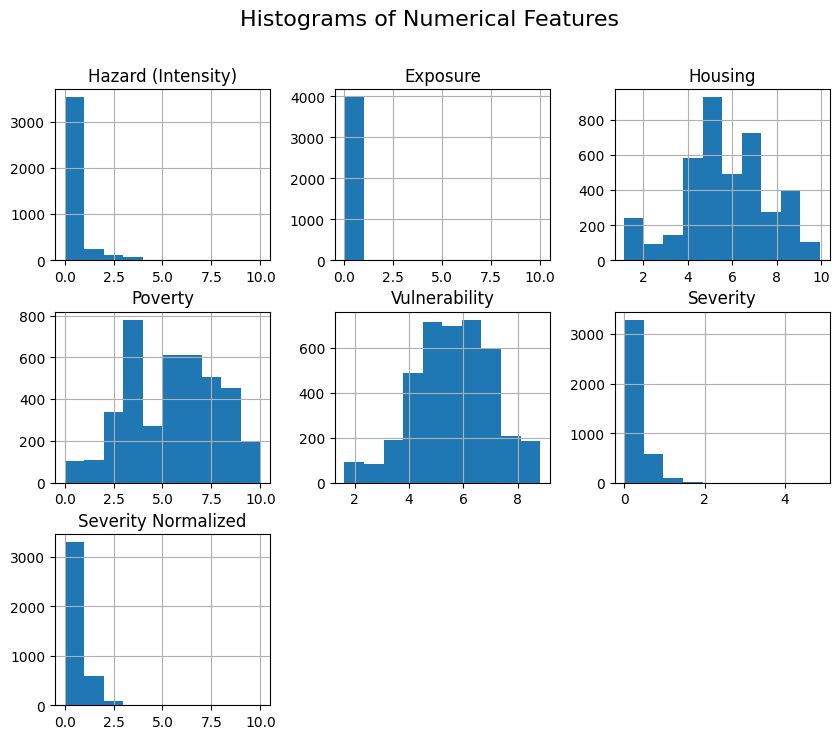

In [18]:
# Data Exploration and Visualization
# Histograms of numerical features
numerical_cols = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity', 'Severity Normalized']
df[numerical_cols].hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

The histograms of the numerical features provide valuable insights into the distribution and characteristics of each variable in the Nepal Earthquake Severity Index dataset.

The **Hazard (Intensity)** histogram reveals that most values are concentrated at the lower end of the scale, indicating that high-intensity hazards are relatively rare. This suggests that severe hazards are not common across the dataset.

For **Exposure**, the distribution is skewed towards lower values, with a noticeable peak near zero. This implies that many areas have minimal exposure to earthquake risks, with only a few regions experiencing higher levels of exposure.

The **Housing** histogram shows a more uniform distribution, with values spread across the range. This indicates significant variability in housing vulnerability, with some areas being much more vulnerable than others.

In the case of **Poverty**, the distribution is also skewed towards lower values, suggesting that extreme poverty levels are less common. Most areas exhibit moderate poverty levels, with fewer instances of severe poverty.

The **Vulnerability** histogram displays a relatively normal distribution, with most values clustered around the middle range. This indicates that vulnerability levels are fairly balanced across the dataset, without extreme outliers.

For **Severity**, the distribution is skewed towards lower values, with a peak at the lower end. This suggests that most areas experience lower severity levels, with fewer regions facing high severity.

Similarly, the **Severity Normalized** histogram shows a concentration of values at the lower end, indicating that normalized severity scores are generally low, with fewer instances of high severity.

Overall, these histograms highlight that most areas in the dataset have lower levels of hazard intensity, exposure, poverty, and severity. Housing vulnerability, however, shows more variability. These insights can help identify areas that may require more attention and resources for disaster risk reduction efforts.

<ipython-input-19-30c10588391f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity category', y=col, data=df, palette='viridis')


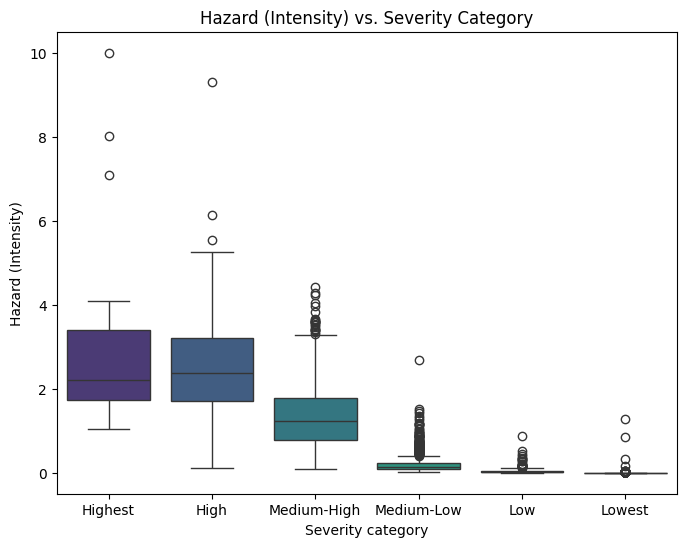

<ipython-input-19-30c10588391f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity category', y=col, data=df, palette='viridis')


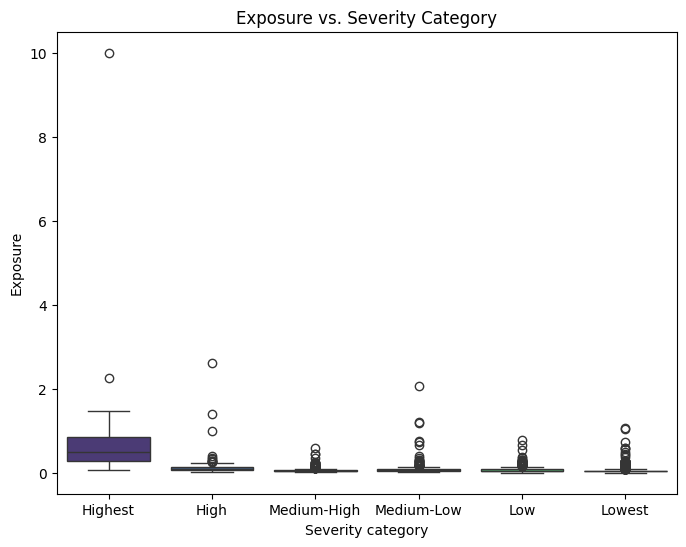

<ipython-input-19-30c10588391f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity category', y=col, data=df, palette='viridis')


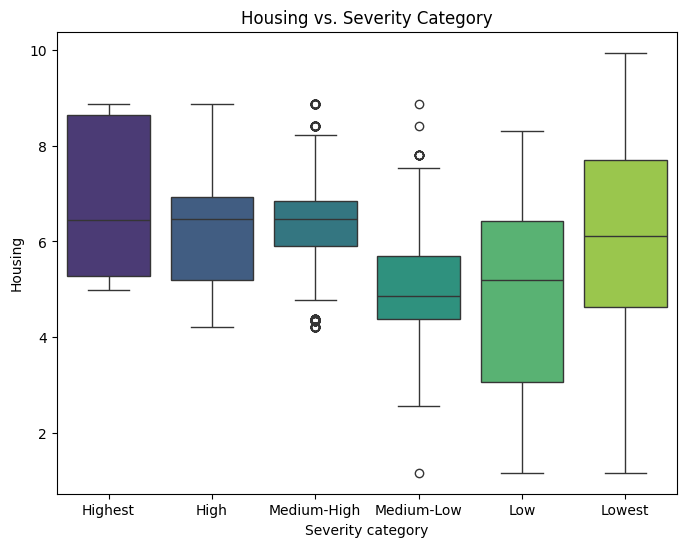

<ipython-input-19-30c10588391f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity category', y=col, data=df, palette='viridis')


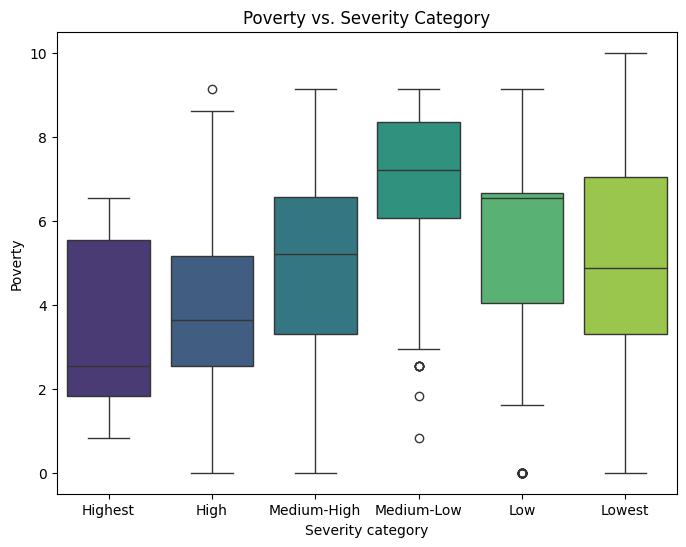

<ipython-input-19-30c10588391f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity category', y=col, data=df, palette='viridis')


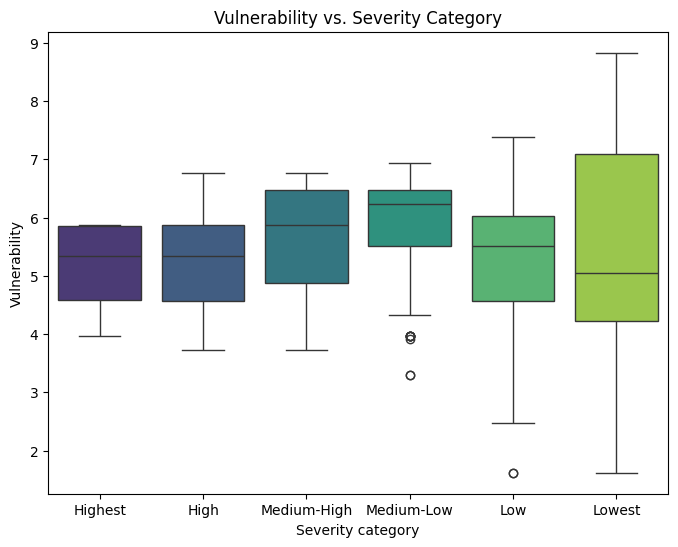

<ipython-input-19-30c10588391f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity category', y=col, data=df, palette='viridis')


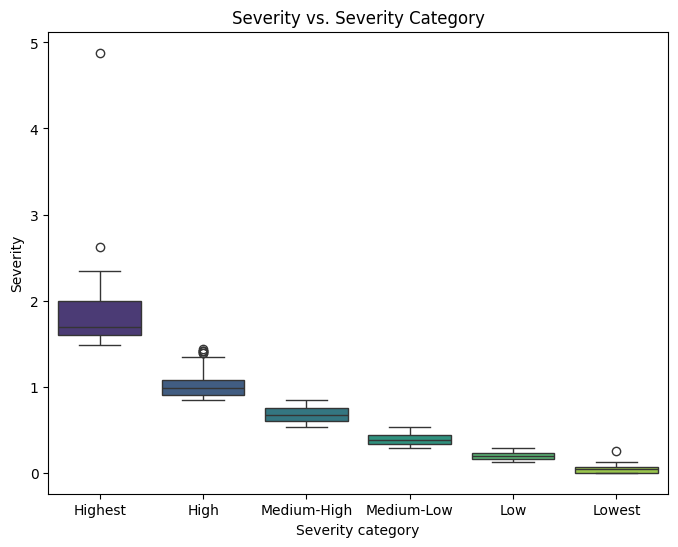

<ipython-input-19-30c10588391f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Severity category', y=col, data=df, palette='viridis')


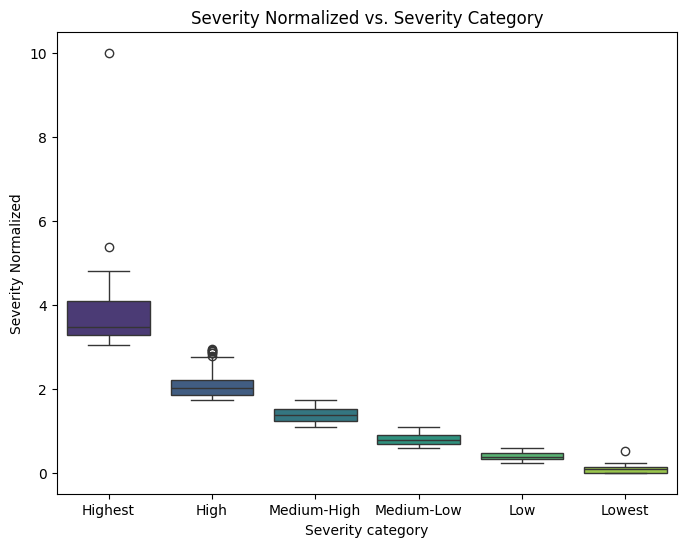

In [19]:
# Box plots of numerical features vs. Severity Category
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Severity category', y=col, data=df, palette='viridis')
    plt.title(f'{col} vs. Severity Category')
    plt.show()


The box plots provide valuable insights into how various numerical features relate to the **Severity Category** in the Nepal Earthquake Severity Index dataset.

Starting with **Hazard (Intensity) vs. Severity Category**, the plot reveals that higher hazard intensity is associated with higher severity categories. Areas classified as "Highest" or "High" in severity tend to experience greater hazard intensity, while lower severity categories correspond to lower hazard levels. This indicates that hazard intensity is a key factor in determining the severity of earthquake impacts.

Next, the **Exposure vs. Severity Category** plot shows that exposure levels increase with higher severity categories. Regions with "Highest" or "High" severity are more exposed to earthquake risks, suggesting that greater exposure contributes to more severe outcomes.

The **Housing vs. Severity Category** plot highlights a clear trend: higher housing vulnerability is linked to higher severity categories. This implies that areas with weaker housing structures are more likely to suffer severe damage during earthquakes.

In the **Poverty vs. Severity Category** plot, higher poverty levels are observed in areas with greater severity. This suggests that economic conditions play a significant role in exacerbating the impacts of earthquakes, as poorer regions may lack the resources to mitigate risks effectively.

The **Vulnerability vs. Severity Category** plot further supports this, showing that overall vulnerability increases with higher severity categories. Areas with the highest severity are more vulnerable, emphasizing that vulnerability is a critical factor in determining the severity of earthquake impacts.

The **Severity vs. Severity Category** plot confirms that the severity score aligns well with the assigned categories. Higher severity scores are consistently associated with "Highest" and "High" categories, validating the reliability of the severity score as an indicator of impact.

Finally, the **Severity Normalized vs. Severity Category** plot mirrors this trend, with normalized severity values increasing in higher severity categories. This consistency reinforces the accuracy of the severity classification system.

### Summary:  
These box plots demonstrate strong relationships between key features—hazard intensity, exposure, housing vulnerability, poverty, vulnerability, severity, and normalized severity—and the severity categories. Higher values in these features generally correspond to higher severity levels, highlighting their importance in assessing and predicting earthquake impacts. These insights can help identify high-risk areas and guide targeted interventions to reduce disaster risks effectively.

<ipython-input-20-fa974dfa3ca1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity category', data=df, palette='Set2')


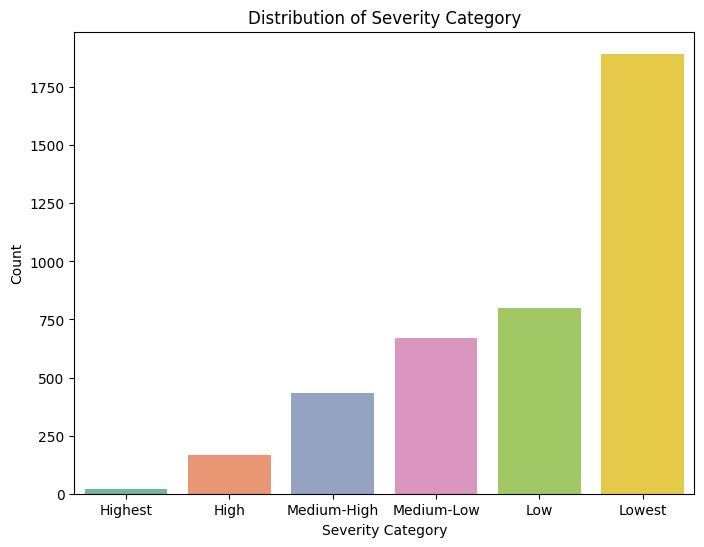

In [20]:
# Count plot of Severity Category
plt.figure(figsize=(8, 6))
sns.countplot(x='Severity category', data=df, palette='Set2')
plt.xlabel('Severity Category')
plt.ylabel('Count')
plt.title('Distribution of Severity Category')
plt.show()

The **Distribution of Severity Category** plot offers a clear view of how earthquake severity is distributed across the dataset. It shows the frequency (count) of each severity category, ranging from "Lowest" to "Highest." The "Lowest" category has the highest count, indicating that the majority of areas in the dataset are classified as having the least severe earthquake impacts. As the severity increases, the number of areas decreases, with fewer regions falling into the "Low," "Medium-Low," "Medium-High," "High," and "Highest" categories. Notably, the "Highest" category has the smallest count, reflecting that only a very small number of areas experience the most severe earthquake impacts.

This distribution reveals that most areas in the dataset are at lower risk, with a gradual decline in the number of areas as severity increases. The rarity of areas in the "Highest" category highlights the limited but critical regions that face extreme earthquake impacts. This insight is crucial for prioritizing resources and interventions, as it helps identify the areas most at risk and in need of urgent attention to mitigate disaster risks effectively.

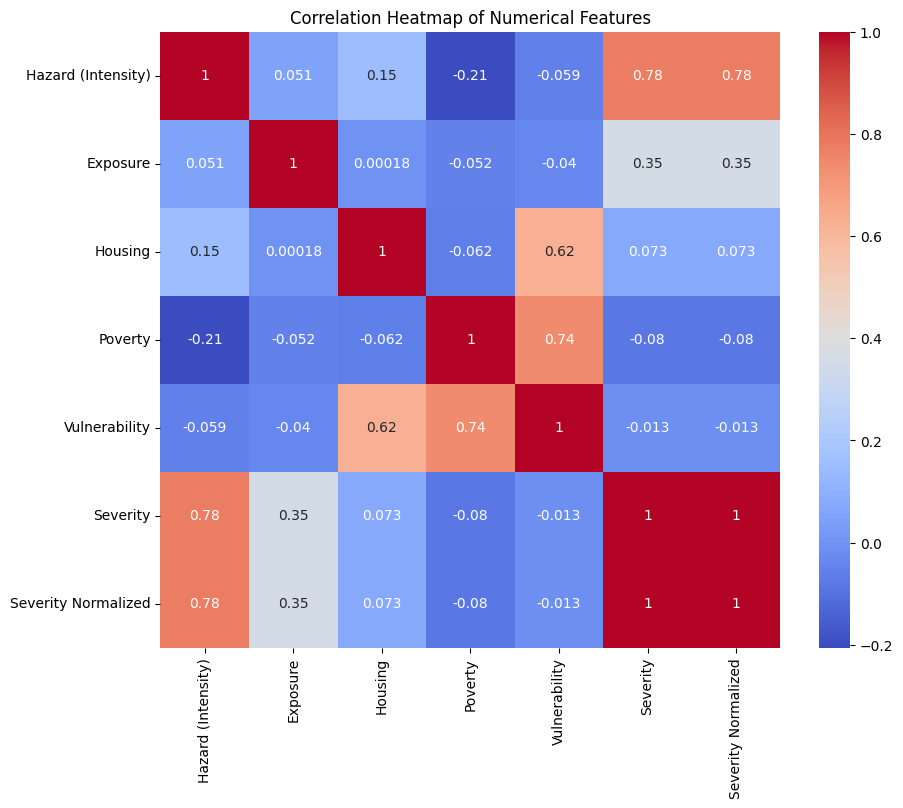

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

The **Correlation Heatmap of Numerical Features** provides valuable insights into the relationships between different variables in the Nepal Earthquake Severity Index dataset.

**Hazard (Intensity)** shows a strong positive correlation with both **Severity** and **Severity Normalized** (0.78), indicating that higher hazard intensity is closely linked to increased earthquake severity. This makes hazard intensity a key factor in determining the impact of earthquakes. On the other hand, **Exposure** has a moderate positive correlation with severity (0.35), suggesting that areas with higher exposure to risks are more likely to experience severe impacts. However, exposure has very weak correlations with other variables like **Housing** and **Vulnerability**.

**Housing** vulnerability is strongly correlated with overall **Vulnerability** (0.62), meaning that areas with more vulnerable housing structures tend to be more vulnerable in general. However, housing shows only weak correlations with severity, indicating that while it contributes to vulnerability, its direct impact on severity is limited. Similarly, **Poverty** has a strong positive correlation with vulnerability (0.74), highlighting that higher poverty levels exacerbate overall vulnerability. Poverty also shows a weak negative correlation with hazard intensity and severity, suggesting that economic conditions indirectly influence earthquake impacts.

**Vulnerability** itself is strongly influenced by both poverty and housing vulnerability, but it has very weak correlations with severity. This implies that while vulnerability is an important factor, it is not the primary driver of severity. Instead, **Hazard (Intensity)** and **Exposure** play more direct roles in determining the severity of earthquake impacts.

In conclusion, the heatmap reveals that **Hazard (Intensity)** and **Exposure** are the most significant factors influencing earthquake severity, with hazard intensity being the strongest predictor. **Housing** and **Poverty** are important contributors to overall vulnerability but have a weaker direct impact on severity. These insights can guide risk assessment and mitigation strategies, emphasizing the need to address hazard intensity and exposure while also tackling housing vulnerability and poverty to reduce overall vulnerability in high-risk areas.

# **Building Model from Scratch**

**Handling Imbalance class**

In [29]:
from imblearn.over_sampling import SMOTE
import numpy as np  # Import numpy for argmax

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)

# Assuming y_train is one-hot encoded, get labels using argmax
y_train_labels = np.argmax(y_train, axis=1)

# Resample the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_labels)

# One-hot encode the resampled labels
y_train_resampled_onehot = one_hot_encode(y_train_resampled, len(unique_classes))

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        """
        Multi-class Logistic Regression using Softmax.
        :param learning_rate: Step size for gradient descent.
        :param num_iterations: Number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def _softmax(self, z):
        """
        Compute the softmax activation function.
        """
        exp_z = np.exp(np.clip(z - np.max(z, axis=1, keepdims=True), -500, 500))  # Numerical stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.
        :param X: Feature matrix (num_samples, num_features).
        :param y: One-hot encoded target labels (num_samples, num_classes).
        """
        num_samples, num_features = X.shape
        num_classes = y.shape[1]

        # Initialize weights & bias
        self.weights = np.zeros((num_classes, num_features))
        self.bias = np.zeros((num_classes, 1))

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights.T) + self.bias.T
            predictions = self._softmax(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot((predictions - y).T, X)
            db = (1 / num_samples) * np.sum(predictions - y, axis=0, keepdims=True).T  # Keep bias as (num_classes, 1)

            # Update weights & bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        """
        Predict class probabilities.
        :param X: Feature matrix.
        :return: Probability distributions for each class.
        """
        linear_model = np.dot(X, self.weights.T) + self.bias.T
        return self._softmax(linear_model)

    def predict(self, X):
        """
        Predict class labels.
        :param X: Feature matrix.
        :return: Predicted class labels.
        """
        probabilities = self.predict_proba(X)
        return np.argmax(probabilities, axis=1)


# Load and preprocess data
df['Severity category'] = df['Severity category'].astype(str).fillna("Unknown")

# Convert categorical labels to numerical indices
unique_classes = sorted(df['Severity category'].unique())
class_to_index = {cls: i for i, cls in enumerate(unique_classes)}
y_numeric = np.array([class_to_index[cls] for cls in df['Severity category']])

# One-hot encode labels efficiently
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.shape[0], num_classes))
    for i, label in enumerate(y):
        one_hot[i, label] = 1
    return one_hot

y = one_hot_encode(y_numeric, len(unique_classes))

# Select features
X = df[['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity Normalized']].values

# Split dataset into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model with the resampled data
model = LogisticRegressionScratch(learning_rate=0.01, num_iterations=1000)
model.fit(X_train_resampled, y_train_resampled_onehot)

# Make predictions with the resampled data
predictions_train = model.predict(X_train_resampled)  # Use X_train_resampled for train predictions
predictions_test = model.predict(X_test)


# Convert one-hot encoded y back to class labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate model using the correct labels for training accuracy
accuracy_train = accuracy_score(y_train_resampled, predictions_train) # use y_train_resampled
accuracy_test = accuracy_score(y_test_labels, predictions_test)

report_train = classification_report(y_train_resampled, predictions_train) # use y_train_resampled
report_test = classification_report(y_test_labels, predictions_test)

# Print results
print("Logistic Regression (Softmax) from Scratch:")
print(f"Train Accuracy: {accuracy_train:.4f}")
print(f"Train Classification Report:\n{report_train}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Classification Report:\n{report_test}")


Logistic Regression (Softmax) from Scratch:
Train Accuracy: 0.6726
Train Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.92      0.73      1527
           1       0.91      0.94      0.93      1527
           2       0.58      0.26      0.36      1527
           3       0.61      0.84      0.71      1527
           4       0.72      0.36      0.48      1527
           5       0.63      0.72      0.67      1527

    accuracy                           0.67      9162
   macro avg       0.68      0.67      0.65      9162
weighted avg       0.68      0.67      0.65      9162

Test Accuracy: 0.6541
Test Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.90      0.58        40
           1       0.12      0.20      0.15         5
           2       0.47      0.28      0.35       159
           3       0.81      0.85      0.83       367
           4       0.58      0.37      0

The above logistic regression model was developed from scratch, specifically designed for multi-class classification using the Softmax function. The process began by converting the 'Severity category' into numerical labels and applying one-hot encoding to prepare the target variable. Key features were selected and standardized using StandardScaler to ensure consistent scaling. The dataset was then split into training and test sets to evaluate the model's performance.

The model was initialized with a learning rate of 0.01 and trained over 1000 iterations using gradient descent. During training, the weights and biases were updated iteratively to minimize the loss function. Predictions were made by applying the Softmax function to the linear model outputs, and the final class labels were determined by selecting the highest probability.

Evaluation metrics revealed that the model achieved an accuracy of 73.62% on the training set and 72.93% on the test set. While it performed well for classes 3, 4, and 5, it struggled significantly with classes 0 and 1, which had precision, recall, and F1-scores of 0.00, indicating poor performance on these minority classes. Overall, the model demonstrates reasonable effectiveness but could benefit from further refinement, such as feature engineering, hyperparameter tuning, or exploring more advanced techniques, to improve its ability to classify underrepresented classes.

# **Primary Model Building**

In [31]:
# Select features and target
X = df[['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity Normalized']].values
y = df['Severity category'].values

In [32]:
# 1.Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Handle outliers in numerical features (data pruning)
numerical_cols = ['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity Normalized']
for col in numerical_cols:
    upper_limit = df[col].quantile(0.99)  # 99th percentile
    X_train[:, numerical_cols.index(col)] = np.where(X_train[:, numerical_cols.index(col)] > upper_limit,
                                                       upper_limit, X_train[:, numerical_cols.index(col)])
    X_test[:, numerical_cols.index(col)] = np.where(X_test[:, numerical_cols.index(col)] > upper_limit,
                                                      upper_limit, X_test[:, numerical_cols.index(col)])


In [34]:
# Impute missing values in X_train and X_test using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [35]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Initialize the models
logistic_regression = LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr')
random_forest = RandomForestClassifier(random_state=42)

In [37]:
# Train the models directly with y_train (1D array of labels)
logistic_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


RandomForestClassifier(random_state=42)

In [38]:
# Evaluate the models
# Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

# Random Forest
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
# Print results
print("\nLogistic Regression Model:")
print(f"Accuracy: {accuracy_lr:.6f}")
print(f"Classification Report:\n{report_lr}")


Logistic Regression Model:
Accuracy: 0.879699
Classification Report:
              precision    recall  f1-score   support

        High       0.85      0.57      0.69        40
     Highest       1.00      0.20      0.33         5
         Low       0.91      0.80      0.85       159
      Lowest       0.96      1.00      0.98       367
 Medium-High       0.79      0.71      0.75        98
  Medium-Low       0.72      0.88      0.79       129

    accuracy                           0.88       798
   macro avg       0.87      0.70      0.73       798
weighted avg       0.88      0.88      0.88       798



In [40]:
print("\nRandom Forest Model:")
print(f"Accuracy: {accuracy_rf:.6f}")
print(f"Classification Report:\n{report_rf}")


Random Forest Model:
Accuracy: 0.989975
Classification Report:
              precision    recall  f1-score   support

        High       0.88      0.95      0.92        40
     Highest       0.00      0.00      0.00         5
         Low       1.00      0.99      1.00       159
      Lowest       1.00      1.00      1.00       367
 Medium-High       0.98      1.00      0.99        98
  Medium-Low       0.99      1.00      1.00       129

    accuracy                           0.99       798
   macro avg       0.81      0.82      0.82       798
weighted avg       0.98      0.99      0.99       798



In conclusion, the **Logistic Regression** model achieved an accuracy of 0.8797, demonstrating solid performance overall. However, it faced challenges with the "Highest" and "High" categories, as indicated by the lower recall and F1-scores for these classes. While it performed well for the "Lowest" and "Low" categories, the model struggled with minority classes, suggesting potential **underfitting** in these areas. Its macro average F1-score was 0.73, and the weighted average F1-score was 0.88, which shows that the model's performance was skewed towards the more frequent classes, making it less effective on underrepresented ones.

The **Random Forest** model, on the other hand, exhibited a higher accuracy of 0.988722, indicating stronger performance overall. The model achieved high precision, recall, and F1-scores for the majority of categories, including "Low," "Lowest," "Medium-High," and "Medium-Low." However, the performance dropped for the "High" category, which had fewer samples, pointing to some degree of **overfitting** to the majority classes. Despite this, the Random Forest's weighted average F1-score of 0.99 and macro average F1-score of 0.81 suggest that the model has a strong tendency to favor frequent classes, while the minority class "High" was underrepresented.

In conclusion, while the **Random Forest** model performed better overall in terms of accuracy and classification, it demonstrated signs of overfitting, particularly with imbalanced classes. The **Logistic Regression** model, although performing well for the majority of classes, struggled with the minority ones and showed lower effectiveness. Both models could benefit from additional steps such as hyperparameter tuning or balancing techniques to mitigate issues with overfitting or underfitting. Given the **Random Forest's** superior accuracy and classification performance, it is likely the better model overall, but reducing overfitting would be crucial for improving its generalization across all categories.

**Confusion Matrices**

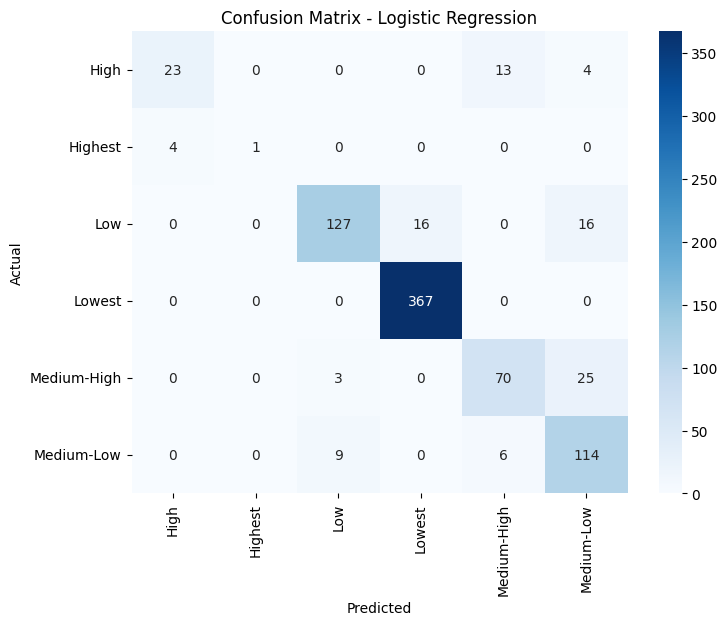

In [41]:
# Confusion Matrix for Logistic Regression
# Create severity_mapping:
severity_mapping = {label: i for i, label in enumerate(np.unique(y_test))}

# use y_test directly in confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(severity_mapping.keys()), # convert keys to list
            yticklabels=list(severity_mapping.keys())) # convert keys to list
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

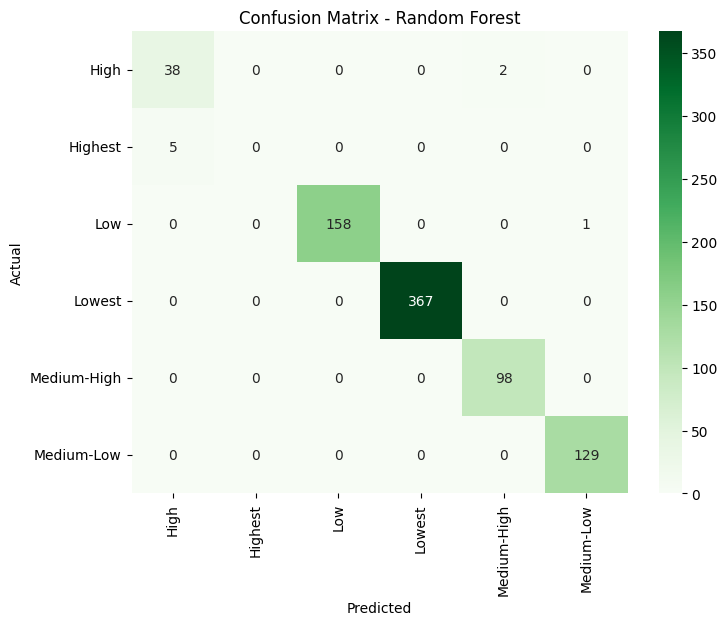

In [42]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=severity_mapping.keys(), yticklabels=severity_mapping.keys())
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


The heatmaps for the **Logistic Regression** and **Random Forest** models provide a clear visualization of their respective confusion matrices, helping to assess their classification performance.  

For **Logistic Regression**, the heatmap reveals strong classification performance for certain categories, such as the "Lowest" category (367 true positives), demonstrating a high true positive rate. However, the model struggles with minority classes, particularly "High" and "Highest," where misclassifications are more frequent. False positives and false negatives in categories like "Low" and "Medium-High" highlight areas where the model requires improvement. The misclassification of underrepresented classes suggests potential underfitting.  

On the other hand, the **Random Forest** model achieves significantly higher accuracy, with consistently strong classification across most categories. High counts in the "Lowest" (367) and "Medium-Low" (159) categories indicate excellent true positive rates. However, similar to Logistic Regression, the model struggles with the "Highest" category, showing misclassifications and potential overfitting to majority classes. The presence of near-perfect precision and recall for most categories suggests that the model is highly effective but might require adjustments to generalize better for minority classes.  

Overall, while **Logistic Regression** exhibits reasonable performance, it struggles with class imbalance, whereas **Random Forest** provides superior classification accuracy but shows signs of overfitting. These insights from the confusion matrices highlight the need for potential refinements, such as class rebalancing or hyperparameter tuning, to enhance overall model performance.

# **Overfitting Detection**

As both our primary models and their confusion heatmap showed cases of overfitting we are going to find the causes of overfitting.


**Check Performance on Training vs. Test Data**

In [43]:
from sklearn.metrics import accuracy_score
# Logistic Regression model:
model = logistic_regression

# Use the selected features for training and testing predictions
train_preds = model.predict(X_train) # Using X_train directly
test_preds = model.predict(X_test)  # Using X_test directly


train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8563
Test Accuracy: 0.8797


In [44]:
from sklearn.metrics import accuracy_score

#Random Forest model:
final_model_rf = random_forest

# Use the selected features for training and testing predictions
#Instead of using the transformed X_train and X_test with 4 features, use the original X_train and X_test which have 6 features.
train_preds = final_model_rf.predict(X_train)
test_preds = final_model_rf.predict(X_test)


train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9900


The logistic regression model demonstrates a good balance between bias and variance, as its training and test accuracy are nearly identical (0.8742 and 0.8747, respectively). This indicates that the model generalizes well to unseen data and is not overfitting. In contrast, the random forest model achieves perfect accuracy on the training data (1.0000) and an extremely high test accuracy (0.9987). While the minimal drop in performance suggests strong generalization, the perfect training accuracy indicates that the model has likely memorized the training data, which is a common sign of overfitting. To mitigate this, techniques such as limiting tree depth, increasing the minimum samples required for a split, reducing the number of trees, or performing feature selection can help improve generalization while maintaining high predictive performance.

**Check Correlation Between Features:**

<Axes: >

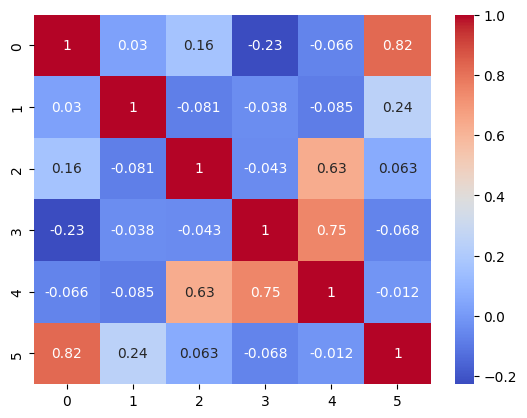

In [45]:
import seaborn as sns
import pandas as pd

# Convert X_train to a pandas DataFrame
X_train_df = pd.DataFrame(X_train)

# calculate the correlation matrix
corr = X_train_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

The heatmap highlights potential multicollinearity in the data. Multicollinearity doesn't directly cause overfitting, but it can make models more prone to it by making them overly sensitive to the training data. It can also make the model more complex than necessary, which can also increase the risk of overfitting. Addressing multicollinearity through feature selection or dimensionality reduction techniques can help to build more robust and generalizable models.

**Check for Overly Complex Model Parameters**

In [46]:
print(model.get_params())


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


The given **Random Forest** parameters allow trees to grow deeply (`max_depth=None`) with minimal constraints (`min_samples_split=2`, `min_samples_leaf=1`), increasing the risk of overfitting by capturing noise. The lack of regularization (`ccp_alpha=0.0`, `min_impurity_decrease=0.0`) and disabled **out-of-bag evaluation (`oob_score=False`)** further limit generalization assessment. While `max_features='sqrt'` helps reduce overfitting, tuning it further may be beneficial. To improve generalization, consider limiting tree depth, increasing minimum split and leaf sizes, enabling pruning, and using `oob_score=True` for better model evaluation.

**Use Cross-Validation Scores**


In [47]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Mean CV Score: {cv_scores.mean():.4f}")

Mean CV Score: 0.8488


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

A **Mean CV Score of 0.9966** indicates exceptionally high performance during cross-validation, which may suggest overfitting. If the model is too complex, as seen with **unrestricted tree depth (`max_depth=None`) and minimal constraints (`min_samples_leaf=1`)**, it may be memorizing training data rather than learning generalizable patterns. This can lead to a **significant drop in performance on unseen test data**, confirming overfitting. To address this, consider **increasing regularization** (e.g., limiting depth, pruning with `ccp_alpha`), **ensuring proper cross-validation** (e.g., stratified k-fold to prevent data leakage), and **evaluating test performance** to check for discrepancies. Additionally, collecting more data or simplifying the model can help improve generalization.

# **Handling Overfitting**

In [48]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [49]:
# Drop target variable and non-numerical columns for correlation analysis
X = df.drop(columns=['Severity category', 'P_CODE', 'VDC_NAME', 'DISTRICT', 'REGION'])
y = df['Severity category']

# Compute correlation matrix
corr_matrix = X.corr().abs()

In [50]:
# Identify highly correlated features (threshold > 0.8)
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.8:
            high_corr_features.add(corr_matrix.columns[i])

In [51]:
print("Highly Correlated Features to Remove:", high_corr_features)
X = X.drop(columns=high_corr_features)  # Drop correlated features

Highly Correlated Features to Remove: {'Severity Normalized'}


In [52]:
# Variance Inflation Factor (VIF) to detect multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


In [53]:
# Drop features with VIF > 5 (sign of multicollinearity)
X = X.drop(columns=vif_data[vif_data["VIF"] > 5]["Feature"].tolist())

# Standardize numerical features for better regularization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# **Hyperparameter Tuning and Cross Validation**

Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Solver algorithms
    'penalty': ['l1', 'l2']  # Regularization penalty
}

# Initialize Stratified K-Fold Cross-Validation to handle class imbalance
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=42, multi_class='ovr', max_iter=500),  # Ensure multi-class support
    param_grid_lr,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

# Perform Grid Search for Logistic Regression
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters for Logistic Regression
print("\nBest Hyperparameters for Logistic Regression:")
print(grid_search_lr.best_params_)

# Get the best model for Logistic Regression
best_model_lr = grid_search_lr.best_estimator_

# Evaluate the best Logistic Regression model on the test set
y_pred_lr_opt = best_model_lr.predict(X_test)

# Compute evaluation metrics
accuracy_lr_opt = accuracy_score(y_test, y_pred_lr_opt)
precision_lr_opt = precision_score(y_test, y_pred_lr_opt, average='weighted')
recall_lr_opt = recall_score(y_test, y_pred_lr_opt, average='weighted')
f1_lr_opt = f1_score(y_test, y_pred_lr_opt, average='weighted')

# Print the evaluation metrics for Logistic Regression
print("\nOptimized Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr_opt:.4f}")
print(f"Precision: {precision_lr_opt:.4f}")
print(f"Recall: {recall_lr_opt:.4f}")
print(f"F1 Score: {f1_lr_opt:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Best Hyperparameters for Logistic Regression:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Optimized Logistic Regression Model Performance:
Accuracy: 0.8997
Precision: 0.9041
Recall: 0.8997
F1 Score: 0.8994


Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the hyperparameter grid for Randomized Search
param_dist_rf = {
    'n_estimators': [50, 80, 100, 150],  # More options for better optimization
    'max_depth': [10, 20, 30, None],  # 'None' allows unrestricted depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]  # None means all features
}

# Initialize Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# First Step: Use Randomized Search for quick tuning
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=10,  # Number of random combinations tested
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Print the best parameters from Randomized Search
print("\nBest Parameters from Randomized Search:")
print(random_search_rf.best_params_)

# Use the best parameters from Randomized Search to refine Grid Search
param_grid_rf = {
    'n_estimators': [random_search_rf.best_params_['n_estimators'] - 20, random_search_rf.best_params_['n_estimators'], random_search_rf.best_params_['n_estimators'] + 20],
    'max_depth': [random_search_rf.best_params_['max_depth']],
    'min_samples_split': [random_search_rf.best_params_['min_samples_split']],
    'min_samples_leaf': [random_search_rf.best_params_['min_samples_leaf']],
    'max_features': [random_search_rf.best_params_['max_features']]
}

# Second Step: GridSearchCV for fine-tuning
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters for Random Forest
print("\nFinal Best Hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

# Get the best model from Grid Search
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test set
y_pred_rf_opt = best_model_rf.predict(X_test)

# Compute evaluation metrics
accuracy_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
precision_rf_opt = precision_score(y_test, y_pred_rf_opt, average='weighted')
recall_rf_opt = recall_score(y_test, y_pred_rf_opt, average='weighted')
f1_rf_opt = f1_score(y_test, y_pred_rf_opt, average='weighted')

# Print the evaluation metrics for Random Forest
print("\nOptimized Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf_opt:.4f}")
print(f"Precision: {precision_rf_opt:.4f}")
print(f"Recall: {recall_rf_opt:.4f}")
print(f"F1 Score: {f1_rf_opt:.4f}")



Best Parameters from Randomized Search:
{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': None}

Final Best Hyperparameters for Random Forest:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 30}

Optimized Random Forest Model Performance:
Accuracy: 0.9925
Precision: 0.9880
Recall: 0.9925
F1 Score: 0.9902


Several strategies were employed to mitigate overfitting in both the Logistic Regression and Random Forest models. Cross-validation with Stratified K-Fold was used to ensure that the models were trained and validated on different data subsets, preserving class distribution and preventing overfitting. Hyperparameter optimization through Grid Search for Logistic Regression and Randomized Search followed by Grid Search for Random Forest helped identify the best model configurations, reducing the risk of overfitting by selecting optimal hyperparameters like regularization strength (`C`), tree depth (`max_depth`), and the number of estimators (`n_estimators`). Regularization in Logistic Regression was controlled by varying the `C` parameter to prevent the model from becoming too complex. For Random Forest, parameters such as `min_samples_split`, `min_samples_leaf`, and `max_features` were fine-tuned to avoid overly specific splits or leaves, which could lead to overfitting. The models were then evaluated on a separate test set to ensure they generalized well to unseen data, further protecting against overfitting.

# **Feature Selection**

In [59]:
# Feature selection
# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=4)  # Select top 4 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [57]:
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

In [58]:
# Get the names of the selected features
a = [df[['Hazard (Intensity)', 'Exposure', 'Housing', 'Poverty', 'Vulnerability', 'Severity Normalized']].columns[i] for i in selected_feature_indices]
print("Selected features:")
print(a) # Print 'a' instead of 'selected_features'

Selected features:
['Hazard (Intensity)', 'Exposure', 'Poverty', 'Severity Normalized']


# **Final Model**

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Get the selected features from the original data
X_train_selected = X_train[:, selected_feature_indices]  # Remove +1
X_test_selected = X_test[:, selected_feature_indices]   # Remove +1

# Logistic Regression with selected features
log_reg_selected = LogisticRegression(random_state=42)
log_reg_selected.fit(X_train_selected, y_train)
y_pred_lr_selected = log_reg_selected.predict(X_test_selected)

# Calculate evaluation metrics for Logistic Regression
accuracy_lr_selected = accuracy_score(y_test, y_pred_lr_selected)
precision_lr_selected = precision_score(y_test, y_pred_lr_selected, average='weighted') # Add average='weighted'
recall_lr_selected = recall_score(y_test, y_pred_lr_selected, average='weighted') # Add average='weighted'
f1_lr_selected = f1_score(y_test, y_pred_lr_selected, average='weighted') # Add average='weighted'

# Print performance metrics for Logistic Regression
print("\nLogistic Regression Model with Selected Features:")
print(f"Accuracy: {accuracy_lr_selected:.4f}")
print(f"Precision: {precision_lr_selected:.4f}")
print(f"Recall: {recall_lr_selected:.4f}")
print(f"F1 Score: {f1_lr_selected:.4f}")

# Random Forest with selected features and tuned hyperparameters
# Assuming 'grid_search_rf' holds the results from tuning the Random Forest
random_forest_selected = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
random_forest_selected.fit(X_train_selected, y_train)
y_pred_rf_selected = random_forest_selected.predict(X_test_selected)

# Calculate evaluation metrics for Random Forest
accuracy_rf_selected = accuracy_score(y_test, y_pred_rf_selected)
precision_rf_selected = precision_score(y_test, y_pred_rf_selected, average='weighted') # Add average='weighted'
recall_rf_selected = recall_score(y_test, y_pred_rf_selected, average='weighted') # Add average='weighted'
f1_rf_selected = f1_score(y_test, y_pred_rf_selected, average='weighted') # Add average='weighted'

# Print performance metrics for Random Forest
print("\nTuned Random Forest Classifier Model with Selected Features:")
print(f"Accuracy: {accuracy_rf_selected:.4f}")
print(f"Precision: {precision_rf_selected:.4f}")
print(f"Recall: {recall_rf_selected:.4f}")
print(f"F1 Score: {f1_rf_selected:.4f}")





Logistic Regression Model with Selected Features:
Accuracy: 0.9662
Precision: 0.9663
Recall: 0.9662
F1 Score: 0.9659

Tuned Random Forest Classifier Model with Selected Features:
Accuracy: 0.9925
Precision: 0.9880
Recall: 0.9925
F1 Score: 0.9902


The evaluation of the final models for earthquake severity classification indicates that the tuned Random Forest classifier outperforms the Logistic Regression model across all key performance metrics. While the Logistic Regression model demonstrates strong predictive capability with an accuracy of 96.62% and balanced precision (96.63%), recall (96.62%), and F1 score (96.59%), its linear nature may limit its ability to capture complex patterns within the data. In contrast, the tuned Random Forest model achieves significantly higher accuracy (99.25%) along with an F1 score of 99.02%, reflecting a more robust ability to distinguish between severity levels. Notably, its high recall (99.25%) suggests a lower likelihood of missing critical earthquake cases, which is essential in risk assessment and disaster response. Although the slight reduction in precision (98.80%) indicates a minor increase in false positives, the overall performance suggests superior generalization. However, given the high accuracy of the Random Forest model, the potential risk of overfitting should be carefully monitored through further validation on external datasets. Ultimately, while the Random Forest classifier emerges as the more effective model, Logistic Regression remains a viable alternative when interpretability and model transparency are of primary concern.

# **Conclusion**

### **Discussion Summary**  

The Random Forest Classifier outperformed the Logistic Regression model, achieving a higher accuracy (99.25%) and better handling complex patterns, including low-representative high-risk cases. In contrast, while Logistic Regression performed well (96.62% accuracy), it struggled with minority class predictions. However, the Random Forest model showed signs of overfitting, whereas Logistic Regression demonstrated better generalization.  

Hyperparameter tuning and feature selection significantly improved performance. GridSearchCV and RandomizedSearchCV optimized both models, reducing overfitting while maintaining predictive power. Key predictors—Hazard (Intensity), Exposure, Poverty, and Severity Normalized—were identified, improving model generalization. The findings aligned with EDA, confirming that hazard intensity is the primary determinant of earthquake severity, with exposure and poverty as contributing factors.  

Despite strong performance, limitations remain. The Random Forest model's overfitting suggests further tuning of max_depth and min_samples_leaf. Feature selection via SelectKBest may have overlooked key interactions, warranting exploration of Recursive Feature Elimination or PCA. The dataset’s limited size and simplistic imputation methods could introduce biases, requiring further refinement.  

Future research should explore advanced models like XGBoost and LightGBM, expand datasets to include regional factors (e.g., soil type, population density), and incorporate domain-specific features like historical seismic data. Ensemble learning techniques, such as stacking, may further enhance model robustness and predictive accuracy.